<a href="https://colab.research.google.com/github/andrew-wairegi-school/core-week-2-IP/blob/main/Moringa_Data_Science_Core_W2_Independent_Project_2021_10_Andrew_Wairegi_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Financial service inclusion (East Africa)

In [170]:
# Github: https://github.com/andrew-wairegi-school/core-week-2-IP
# Dataset link:  https://ia803002.us.archive.org/20/items/financial_dataset/Financial%20Dataset%20-%201.csv

Data definitions:

*   Country - Country of Interviewee
*   Year - Year of Survey
*   Uniqueid - Unique Identifier for interviewee
*   location_type - Location (Rural / Urban)
*   cellphone_access - Access to cellphone (Yes / No)
*   household_size - Number of people living in the house
*   age_of_respondent - Age of the respondent
*   gender_of_respondent - Gender (Male / Female)
*   relationship_with_head - Relationship with head of household (Head of Household / Spouse / Child / Parent / Other relative / Other non-relatives / Dont know)
*   marital_status - Marital status ("Married/Living together" / "Divorced/Seperated" / "Widowed" / "Single/Never Married" / "Don’t know")
*   education_level - Highest level of Education ("No formal education" / "Primary education" / "Secondary education" / "Vocational/Specialised training" / "Tertiary education" / "Other/Dont know/RTA")
*   job_type - Type of job ("Farming and Fishing" / "Self employed" / "Formally employed Government" / "Formally employed Private" / "Informally employed" / "Remittance Dependent" / "Government Dependent" / "Other Income" / "No Income" / "Dont Know/Refuse to answer")











## 1. Defining the Question

### Question

To predict what individuals will use or have a bank account ?

### Metric for success

The accuracy of the model in predicting who will own or use a bank account

### Context

Financial inclusion has been one of the biggest problems in Africa. When dealing with economic developement. It allows households to be able to save their money safely, as well as make payments when they do not have a physical means to pay their creditors. It also allows businesses to build up their credit-worthiness. Which will allow them to borrow money later, or build up their stocks. Helping to develop the economy. This is why financial inclusion is important to development in the economy. Not only in African countries but also in other countries worldwide.

### Experimental Design

1. Clean the data & prepare (for model)
2. Exploratory data analysis (Univariate, Bivariate, & Multivariate)
4. Create the model
5. Do predictions
6. Evaluate the model and solution

### Appropriateness of the data

The data is appropriate because it looks at several African countries, and their data inclusion. This will be able to give us the right insights.
 
If it has enough data to give use an accurate analysis.

## 2. Reading the data

In [171]:
# Step 1: Import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [172]:
# Step 2: Reading the dataset
df = pd.read_csv("Financial Dataset - 1.csv", na_values = "nan")
df.head(2)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


## 3. Checking the Data

In [173]:
# Determine the number of records
df.shape

(23524, 13)

In [174]:
# Preview the top of the dataset
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [175]:
# Preview the tail of the dataset
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [176]:
# Checking if the datatypes of each column are right
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [177]:
# Looks ok

## 4. External data source Validation

I believe the data is valid because it was carried out by Countries. They have also documented it in reports, so I believe it is accurate. They also used the FinScope tool, which is a valid tool for carrying out surveys.

## 5. Cleaning the Dataset

In [178]:
# Step 1: Drop unused columns
df.drop(["uniqueid","year"], axis = 1, inplace = True)

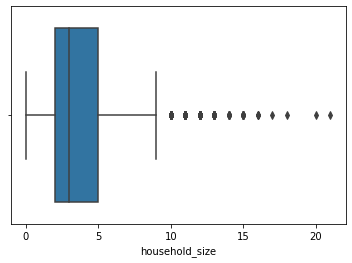

In [179]:
# Step 2: Checking for outliers
sns.boxplot(data = df, x = "household_size")

In [180]:
df["household_size"].max()

21.0

In [181]:
# It's actually possible to have a household of over 20 people
# in some countries. So it is not a outlier. Especially in some rural areas.

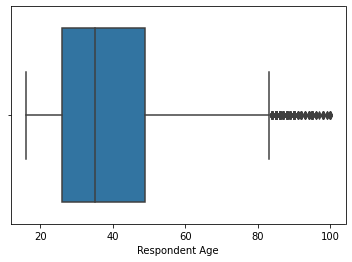

In [182]:
sns.boxplot(data = df, x = "Respondent Age")

In [183]:
# It's possible to have people aged around 100.
# So it is not an outlier. Since everyones age circles around 30 years.
# It is possible that it would show up as an outlier.

In [184]:
# Step 3: Removing missing values
df.isnull().sum()

country                   14
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [185]:
# Drop the rows, becuase there is no
# way to impute them

In [186]:
df.dropna(axis = 0, inplace = True)

In [187]:
df.isnull().sum()

country                   0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [188]:
# Step 4: Check for duplicates
df.duplicated().sum()

4372

In [189]:
df.drop_duplicates(inplace = True)

In [190]:
df.duplicated().sum()

0

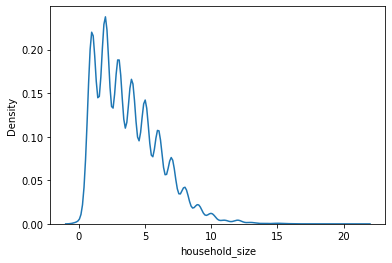

In [191]:
# Step 5: Check for Anomalies
# Household size
sns.kdeplot(data = df, x = "household_size")

In [192]:
# Not too unusual

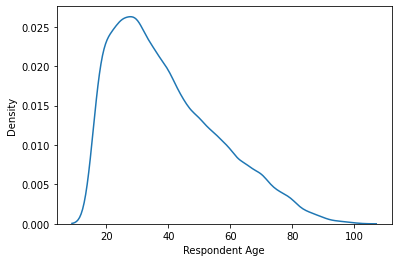

In [193]:
# Respondent Age
sns.kdeplot(data = df, x = "Respondent Age")

In [194]:
# Not unusual. Most people are around
# A certain age.

In [195]:
# Step 6: Change column names
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace("_", " ")
df.rename(columns = {"the relathip with head": "The relationship with head"}, inplace = True)
df.columns

Index(['country', 'has a bank account', 'type of location',
       'cell phone access', 'household size', 'respondent age',
       'gender of respondent', 'The relationship with head', 'marital status',
       'level of educuation', 'type of job'],
      dtype='object')

In [196]:
# Step 7: Remove empty spaces from column names and columns
df.columns = df.columns.str.strip()

columns = ["country", "has a bank account", "type of location", "cell phone access", "gender of respondent", "The relationship with head", "marital status", "level of educuation", "type of job"]
df[columns] = (df[columns].astype(str)).applymap(str.strip)

In [197]:
# Step 8: Remove wrong labels
indexes = list(df[df["level of educuation"] == "6"].index)
df.drop(indexes, axis = 0, inplace = True)

## 6. Data Preparation for the model

Some data columns need to be converted into integers. So that they can be used with the model. This will be done now so that they can be used later easily.

In [198]:
df_num = df.copy()

In [199]:
df_num.columns

Index(['country', 'has a bank account', 'type of location',
       'cell phone access', 'household size', 'respondent age',
       'gender of respondent', 'The relationship with head', 'marital status',
       'level of educuation', 'type of job'],
      dtype='object')

Step 1: Convert columns to categories

In [200]:
df_num["has a bank account"] = df_num["has a bank account"].astype("category")
df_num["type of location"] = df_num["type of location"].astype("category")
df_num["cell phone access"] = df_num["cell phone access"].astype("category")
df_num["gender of respondent"] = df_num["gender of respondent"].astype("category")
df_num["The relationship with head"] = df_num["The relationship with head"].astype("category")
df_num["marital status"] = df_num["marital status"].astype("category")
df_num["level of educuation"] = df_num["level of educuation"].astype("category")
df_num["type of job"] = df_num["type of job"].astype("category")

Step 2: Show keys

In [201]:
# Has a bank account
dict(enumerate(df_num["has a bank account"].cat.categories))

{0: 'No', 1: 'Yes'}

In [202]:
# type of location
dict(enumerate(df_num["type of location"].cat.categories))

{0: 'Rural', 1: 'Urban'}

In [203]:
# cell phone access
dict(enumerate(df_num["cell phone access"].cat.categories))

{0: 'No', 1: 'Yes'}

In [204]:
# gender of respondent
dict(enumerate(df_num["gender of respondent"].cat.categories))

{0: 'Female', 1: 'Male'}

In [205]:
# The relationship with head
dict(enumerate(df_num["gender of respondent"].cat.categories))

{0: 'Female', 1: 'Male'}

In [206]:
# marital status
dict(enumerate(df_num["marital status"].cat.categories))

{0: 'Divorced/Seperated',
 1: 'Dont know',
 2: 'Married/Living together',
 3: 'Single/Never Married',
 4: 'Widowed'}

In [207]:
# level of educuation
dict(enumerate(df_num["level of educuation"].cat.categories))

{0: 'No formal education',
 1: 'Other/Dont know/RTA',
 2: 'Primary education',
 3: 'Secondary education',
 4: 'Tertiary education',
 5: 'Vocational/Specialised training'}

In [208]:
# type of job
dict(enumerate(df_num["type of job"].cat.categories))

{0: 'Dont Know/Refuse to answer',
 1: 'Farming and Fishing',
 2: 'Formally employed Government',
 3: 'Formally employed Private',
 4: 'Government Dependent',
 5: 'Informally employed',
 6: 'No Income',
 7: 'Other Income',
 8: 'Remittance Dependent',
 9: 'Self employed'}

Step 3: Replace column values with column codes

In [209]:
df_num["has a bank account"] = df_num["has a bank account"].cat.codes
df_num["type of location"] = df_num["type of location"].cat.codes
df_num["cell phone access"] = df_num["cell phone access"].cat.codes
df_num["gender of respondent"] = df_num["gender of respondent"].cat.codes
df_num["The relationship with head"] = df_num["The relationship with head"].cat.codes
df_num["marital status"] = df_num["marital status"].cat.codes
df_num["level of educuation"] = df_num["level of educuation"].cat.codes
df_num["type of job"] = df_num["type of job"].cat.codes

Step 4: Preview dataset

In [210]:
df_num.head()

,country,has a bank account,type of location,cell phone access,household size,respondent age,gender of respondent,The relationship with head,marital status,level of educuation,type of job
0,Kenya,1,0,1,3.0,24.0,0,5,2,3,9
1,Kenya,0,0,0,5.0,70.0,0,1,4,0,4
2,Kenya,1,1,1,5.0,26.0,1,3,3,5,9
3,Kenya,0,0,1,5.0,34.0,0,1,2,2,3
4,Kenya,0,1,0,8.0,26.0,1,0,3,2,5


## 7. Exploratory data analysis

#### Univariate analysis

In [211]:
df.describe()

,household size,respondent age
count,18945.000000,18945.000000
mean,3.750911,39.519187
std,2.360325,17.059321
min,0.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,36.000000
75%,5.000000,50.000000
max,21.000000,100.000000


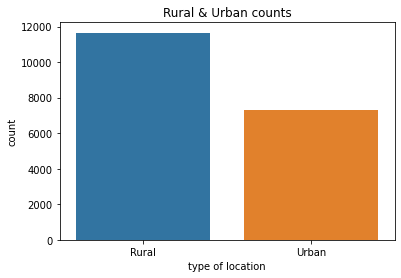

In [212]:
plt.title("Rural & Urban counts")
sns.countplot(data = df, x = "type of location")

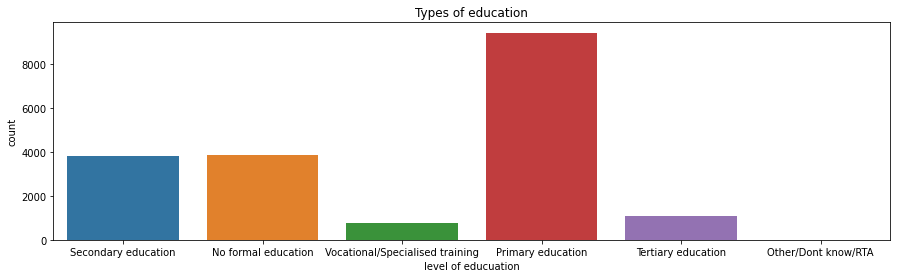

In [213]:
plt.figure(figsize = (15, 4))
plt.title("Types of education")
sns.countplot(data = df, x = "level of educuation")

In [214]:
cell_phone_counts = df["cell phone access"].value_counts()

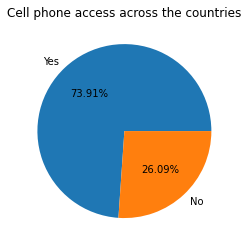

In [215]:
plt.title("Cell phone access across the countries")
plt.pie(x = cell_phone_counts, labels = list(cell_phone_counts.index), autopct = "%.2f%%")
plt.show()

In [216]:
# Cellphone counts, by Country
df[["country", "cell phone access"]].value_counts(sort = False)

country   cell phone access
Kenya     No                   1154
          Yes                  4459
Rwanda    No                   1303
          Yes                  5327
Tanzania  No                   1884
          Yes                  2855
Uganda    No                    602
          Yes                  1361
dtype: int64

#### Bivariate analysis

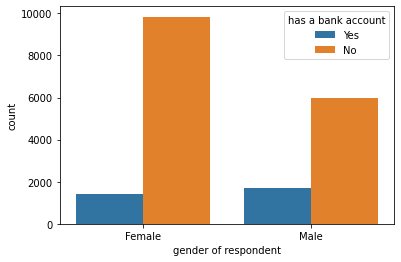

In [217]:
sns.countplot(data = df, x = "gender of respondent", hue = "has a bank account")

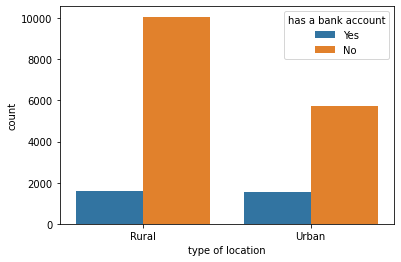

In [218]:
sns.countplot(data = df, x = "type of location", hue = "has a bank account")

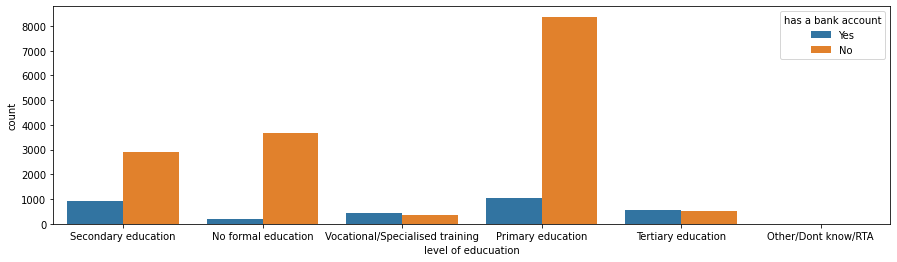

In [219]:
plt.figure(figsize = (15, 4))
sns.countplot(data = df, x = "level of educuation", hue = "has a bank account")

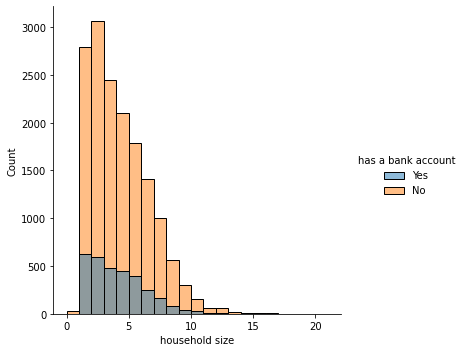

In [220]:
sns.displot(data = df, x = "household size", hue ="has a bank account", bins = 21)

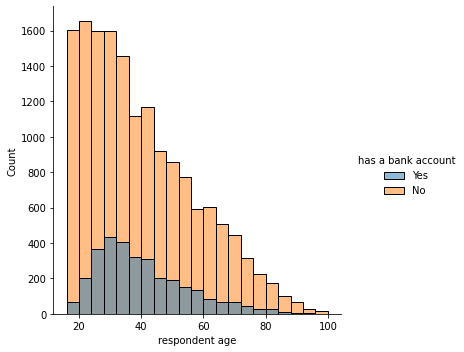

In [221]:
sns.displot(data = df, x = "respondent age", hue ="has a bank account", bins = 21)

#### Multivariate analysis

##### **Factor analysis**

In [222]:
# Install factor analyzer
!pip install factor_analyzer==0.2.3

In [223]:
# Import factor analyzer
from factor_analyzer.factor_analyzer import FactorAnalyzer

In [224]:
# Instance of factor analyzer
factorAnalyzer = FactorAnalyzer()

In [225]:
# Choosing the number of factors (Eigen Values)
df_num_x = df_num.drop("has a bank account", axis = 1)
factorAnalyzer.analyze(df_num_x, 9, rotation=None)
EigenValues, CommonEigenValues  = factorAnalyzer.get_eigenvalues()
EigenValues

,Original_Eigenvalues
0,1.667379
1,1.498482
2,1.467044
3,0.994453
4,0.872540
5,0.755140
6,0.687481
7,0.563562
8,0.493920


In [226]:
# Eigen values above 1: 0, 1, 2

# I will choose 2 factors

In [227]:
# Create factors
factorAnalyzer.analyze(df_num_x, 2, rotation = "varimax")
factorAnalyzer.loadings

,Factor1,Factor2
type of location,0.002440,0.126831
cell phone access,-0.081981,0.303786
household size,0.090013,0.072930
respondent age,-0.121452,-0.559216
gender of respondent,-0.443068,0.146362
The relationship with head,0.965479,0.094637
marital status,-0.084380,-0.275561
level of educuation,-0.082137,0.658992
type of job,0.061581,0.083465


In [228]:
# Factor variances
factorAnalyzer.get_factor_variance()

,Factor1,Factor2
SS Loadings,1.175697,0.973963
Proportion Var,0.130633,0.108218
Cumulative Var,0.130633,0.238851


##### **Principal component analysis**

In [229]:
# Import scaler library
from sklearn.preprocessing import StandardScaler

In [230]:
# Import PCA
from sklearn.decomposition import PCA

In [231]:
# Select X & Y
columns = ['type of location', 'cell phone access', 'household size', 'respondent age', 'gender of respondent', 
       'The relationship with head', 'marital status', 'level of educuation', 'type of job']
X = df_num[columns]
y = df_num["has a bank account"]

In [232]:
# Scale x features
standardScaler = StandardScaler()
standardScaler.fit(X)
X_transformed = standardScaler.transform(X)

In [233]:
# Create PCA analysis
pca = PCA(n_components = 5)
pca.fit(X_transformed)
X_pca = pca.transform(X_transformed)

In [234]:
# Variances explained by each principal component
pca.explained_variance_ratio_

array([0.1852643 , 0.166498  , 0.16300486, 0.11049483, 0.09694885])

##### **Linear Discriminant Analysis**

In [235]:
# Import LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [236]:
# Scale x features
standardScaler = StandardScaler()
standardScaler.fit(X)
X_transformed = standardScaler.transform(X)

In [237]:
# Do LDA analysis
Lda = LDA(n_components = 1)
Lda.fit(X_transformed, y)
X_lda = Lda.transform(X_transformed)

In [238]:
# Variance meant to be explained by each Discriminant
Lda.explained_variance_ratio_

array([1.])

## 8. Solution

##### **Linear Discriminant Analysis**

In [239]:
# Import train test split
from sklearn.model_selection import train_test_split

In [240]:
# Import LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [241]:
# Select X & Y
columns = ['type of location', 'cell phone access', 'household size', 'respondent age', 'gender of respondent', 
       'The relationship with head', 'marital status', 'level of educuation', 'type of job']
X = df_num[columns]
y = df_num["has a bank account"]

In [242]:
# Do train test split, test size = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [243]:
# Scale features x_train & x_test
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train_transformed = standardScaler.transform(X_train)
X_test_transformed = standardScaler.transform(X_test)

In [244]:
# Do LDA analysis
Lda = LDA(n_components = 1)
Lda.fit(X_train_transformed, y_train)
X_train_lda = Lda.transform(X_train_transformed)

In [245]:
# Variance meant to be explained by each Discriminant, 1 discriminant
Lda.explained_variance_ratio_

array([1.])

In [246]:
# Column names in relation to their coefficients
X.columns

Index(['type of location', 'cell phone access', 'household size',
       'respondent age', 'gender of respondent', 'The relationship with head',
       'marital status', 'level of educuation', 'type of job'],
      dtype='object')

In [247]:
Lda.coef_

array([[ 0.2786728 ,  0.49414229, -0.03375889,  0.41698404,  0.21069826,
         0.00328438, -0.02168909,  0.99134637, -0.25946991]])

In [248]:
# Creating predictions
predictions = Lda.predict(X_test_transformed)

In [249]:
# Import confusion matrix and classification report for accuracy evaluation
from sklearn.metrics import confusion_matrix, classification_report

In [250]:
# Accuracy scores confusion matrix
print(confusion_matrix(y_test, predictions))

[[3119   72]
 [ 446  152]]


In [251]:
# Scores classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      3191
           1       0.68      0.25      0.37       598

    accuracy                           0.86      3789
   macro avg       0.78      0.62      0.65      3789
weighted avg       0.84      0.86      0.84      3789



## Conclusion

The linear discriminant analysis technique was able to get us a accuracy score of 87% for finding out if an individual would get a bank account, and 68% if they would not. This means that we are able to accurately predict, with an average of 78%. Which is not bad for a basic model. This type of analysis, allows us to get basic results using it's reduction technique.

In terms of coefficients, it has allowed us to pick out the coefficients of:

1. level of educuation (0.99)
2. cell phone access (0.49)
3. respondent age (0.41)
4. type of location (0.27)

As major factors. In deciding whether an individual has a bank account or not.

## Challenging the solution

I believe we can improve the solution. By using different models. I believe a model different from this one, that is more advanced. Would be able to answer the question. Of which individuals would be financially included, or excluded based on the data we had. However, in terms of coefficients, I believe the Linear Discriminant analysis model has allowed us to pick the right coefficients. As it had an accuracy score of 78% overall.

## Follow up questions

#### a) Did we have the right data ?

Yes I believe we had the right data. We had financial inclusion, for different countries in Africa. This allowed us to gain an overall picture of how financial inclusion was in those countries. Through those years. The years, also were not too spread apart.

#### b) Do we need other data to answer our question ?

I believe the data we had was enough. With us having around 23,000 rows for all the countries. However, it would be good if we had this financial inclusion data for the all the countries, for each of the years. So it did not jump from 2008 to 2009 in another country. This would make the analysis, more accurate.

#### c) Did we have the right question ?

I believe we had the right question. As the data, was centred around this question on financial inclusion. So I believe it was a right question to ask, given the dataset.